In [2]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# PyTorch related imports would go here

In [5]:
# Step 1: Read the CSV into a pandas dataframe

filename = 'PM25-Speciated/IMPROVEDataset/usepa_final_with_assigned_profile.csv'
df = pd.read_csv(filename)

In [6]:
df.head()

,profile_code,Aluminum,Arsenic,Bromine,Calcium,Chlorine,Chromium,Copper,Elemental Carbon,Elemental carbon I,...,Silicon,Sodium,Strontium,Sulfate,Sulfur,Titanium,Vanadium,Zinc,Zirconium,assigned_profile
0,0000010,3.819,1.410,0.0,2.399000,0.0,0.086000,1.057,3.259000,0.0,...,7.736,1.377000,0.014,5.046000,2.632,0.186,0.058,2.218000,0.002,Other
1,000002.5,4.443,1.476,0.0,2.614000,0.0,0.103000,1.056,4.406000,0.0,...,9.491,1.652000,0.014,5.514000,2.972,0.194,0.061,2.233000,0.002,Other
2,0000030,4.024,1.175,0.0,2.945000,0.0,0.130000,1.134,3.957000,0.0,...,8.673,1.407000,0.017,6.169000,2.876,0.206,0.062,2.392000,0.003,Other
3,00000C,4.079,1.118,0.0,2.804000,0.0,0.071000,1.089,4.582000,0.0,...,8.933,1.577000,0.017,5.030000,2.457,0.207,0.059,2.235000,0.004,Other
4,100CROC,0.000,0.000,0.0,0.387691,0.0,0.020472,0.000,44.368701,0.0,...,0.000,0.005178,0.000,0.945113,0.000,0.000,0.000,0.078439,0.000,Gasoline Vehicle


In [10]:
# Create a dictionary to map categories to numerical values
category_mapping = {category: index for index, category in enumerate(df['assigned_profile'].unique())}

In [11]:
# Replace string categories with numerical values
df['assigned_profile'] = df['assigned_profile'].map(category_mapping)

# The updated DataFrame and the mapping dictionary
print(category_mapping)
df.head()

{'Other': 0, 'Gasoline Vehicle': 1, 'Diesel Vehicle': 2, 'CNG Vehicle': 3, 'Aircraft': 4, 'Coal Combustion': 5, 'Marine vessel': 6, 'Oil Combustion': 7, 'Biomass Burning': 8, 'Industrial': 9, 'Industrial Dust': 10, 'Cement Manufacturing': 11, 'Brake Tire Wear': 12, 'Gas Combustion': 13, 'Soil Dust': 14, 'Road Dust': 15, 'Vehicle Composite': 16, 'Volcano': 17, 'Construction': 18, 'Background Air': 19, 'Wildfire': 20, 'Sea Salt': 21}


,profile_code,Aluminum,Arsenic,Bromine,Calcium,Chlorine,Chromium,Copper,Elemental Carbon,Elemental carbon I,...,Silicon,Sodium,Strontium,Sulfate,Sulfur,Titanium,Vanadium,Zinc,Zirconium,assigned_profile
0,0000010,3.819,1.410,0.0,2.399000,0.0,0.086000,1.057,3.259000,0.0,...,7.736,1.377000,0.014,5.046000,2.632,0.186,0.058,2.218000,0.002,0
1,000002.5,4.443,1.476,0.0,2.614000,0.0,0.103000,1.056,4.406000,0.0,...,9.491,1.652000,0.014,5.514000,2.972,0.194,0.061,2.233000,0.002,0
2,0000030,4.024,1.175,0.0,2.945000,0.0,0.130000,1.134,3.957000,0.0,...,8.673,1.407000,0.017,6.169000,2.876,0.206,0.062,2.392000,0.003,0
3,00000C,4.079,1.118,0.0,2.804000,0.0,0.071000,1.089,4.582000,0.0,...,8.933,1.577000,0.017,5.030000,2.457,0.207,0.059,2.235000,0.004,0
4,100CROC,0.000,0.000,0.0,0.387691,0.0,0.020472,0.000,44.368701,0.0,...,0.000,0.005178,0.000,0.945113,0.000,0.000,0.000,0.078439,0.000,1


In [42]:
len(category_mapping)

22

In [7]:
# Step 2: Apply Non-negative matrix factorization on the data except last column
# Handle missing values by filling them with the mean of the column
# df.fillna(df.mean(), inplace=True)

In [17]:
# Separate features and target
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [21]:
print(X.shape)
print(y.shape)

(3877, 37)
(3877,)


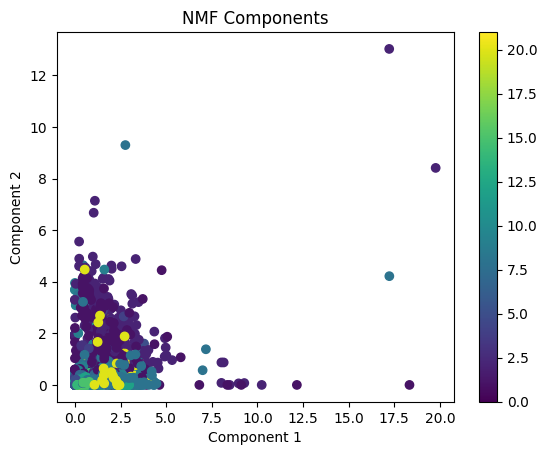

In [24]:
# Initialize NMF and fit to the data
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

# Visualize the data
plt.scatter(W[:, 0], W[:, 1], c=y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('NMF Components')
plt.colorbar()
plt.show()

In [25]:
# Step 3: Use PyTorch MLP to classify the last column
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_scaled = torch.FloatTensor(X_scaled)
y = torch.LongTensor(y)

In [53]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [33]:
# Assuming X and y are already defined as PyTorch tensors
# X = features tensor
# y = labels tensor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [37]:
print(X_train.shape)
print(X_test.shape)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

torch.Size([3101, 37])
torch.Size([776, 37])


In [43]:

# Define a simple MLP model for multi-class classification
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, len(category_mapping))  # Adjusted for 29 classes
        )
        
    def forward(self, x):
        return self.layers(x)

# Initialize the model
model = MLP()

In [44]:
model

MLP(
  (layers): Sequential(
    (0): Linear(in_features=37, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=22, bias=True)
  )
)

In [49]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = torch.optim.Adam(model.parameters())

In [50]:
def train():
    # Training loop
    for epoch in range(100):  # number of epochs can be adjusted
        for batch_idx, (data, target) in enumerate(train_loader):
            # Forward pass
            output = model(data)
            loss = criterion(output, target)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Print loss every 100 batches
            if batch_idx % 100 == 0:
                print(f"Epoch {epoch}, Batch {batch_idx}, Loss: {loss.item()}")

train()

Epoch 0, Batch 0, Loss: 0.2987251877784729
Epoch 1, Batch 0, Loss: 0.33147308230400085
Epoch 2, Batch 0, Loss: 0.3712575137615204
Epoch 3, Batch 0, Loss: 0.2575400769710541
Epoch 4, Batch 0, Loss: 0.2433278113603592
Epoch 5, Batch 0, Loss: 0.21347646415233612
Epoch 6, Batch 0, Loss: 0.17559461295604706
Epoch 7, Batch 0, Loss: 0.3673636317253113
Epoch 8, Batch 0, Loss: 0.27038565278053284
Epoch 9, Batch 0, Loss: 0.25266632437705994
Epoch 10, Batch 0, Loss: 0.3883107602596283
Epoch 11, Batch 0, Loss: 0.22597052156925201
Epoch 12, Batch 0, Loss: 0.19500736892223358
Epoch 13, Batch 0, Loss: 0.2664065957069397
Epoch 14, Batch 0, Loss: 0.1923125982284546
Epoch 15, Batch 0, Loss: 0.2716584801673889
Epoch 16, Batch 0, Loss: 0.33595773577690125
Epoch 17, Batch 0, Loss: 0.37349221110343933
Epoch 18, Batch 0, Loss: 0.32298704981803894
Epoch 19, Batch 0, Loss: 0.42290133237838745
Epoch 20, Batch 0, Loss: 0.13581132888793945
Epoch 21, Batch 0, Loss: 0.1691598892211914
Epoch 22, Batch 0, Loss: 0.205

In [54]:
def test():
    model.eval()
    test_loss = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            all_targets.extend(target.tolist())
            all_predictions.extend(output.argmax(dim=1).tolist())

    test_loss /= len(test_loader.dataset)
    print(f"Test Loss: {test_loss}")

    # Calculate F1 score
    f1 = f1_score(all_targets, all_predictions, average='weighted')
    print(f"F1 Score: {f1}")
    
test()

Test Loss: 0.0195818958208733
F1 Score: 0.8011243754116713
